In [1]:
#R SAI RAJAJI-2017B4A70550H

import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [2]:
def solve(m1,m2,var1,var2):
  a = 1/(2*var1) - 1/(2*var2)
  b = m2/(var1) - m1/(var2)
  c = m1**2 /(2*var1) - m2**2 / (2*var2) - np.log(var2**0.5/var1**0.5)
  return np.roots([a,b,c])

In [3]:
dataset = pd.read_csv('dataset_FLD.csv')
X=dataset.iloc[:,:].values
l = X.shape[1]-1
r = X.shape[0]-1
X0,X1,Y0,Y1=[],[],[],[]
for x in X :
    if x[l]==0 :
        X0.append(x[0:l])
        Y0.append(x[l])
    else :
        X1.append(x[0:l])
        Y1.append(x[l])

X0=np.array((X0))
X1=np.array((X1))
Y0=np.transpose([Y0])
Y1=np.transpose([Y0])

r1 = np.shape(X0)[0]
r2 = np.shape(X1)[0]
m1 = np.sum(X0, axis=0, keepdims=True)/r1
m2 = np.sum(X1, axis=0, keepdims=True)/r2
m1t=np.transpose(m1)
m2t=np.transpose(m2)

sw=0

for x in X0:
    sw = sw+np.matmul(np.transpose(x-m1), x-m1)/r1

for x in X1:
    sw = sw+np.matmul(np.transpose(x-m2), x-m2)/r2


w = np.matmul(np.linalg.inv(sw), np.transpose(m1-m2));
denom=math.sqrt(w[0]*w[0]+w[1]*w[1]+w[2]*w[2])
onedim0= np.matmul(X0, w)
onedim1= np.matmul(X1, w)

v1=np.var(onedim0)
v2=np.var(onedim1)
m1=np.mean(onedim0)
m2=np.mean(onedim1)


soltemp=solve(m1,m2,v1,v2)
sol=0
if ( soltemp[0]<m1 and soltemp[0]> m2 ) or (soltemp[0]<m2 and soltemp[0]>m1) :
    sol=soltemp[0];
else :
    sol=soltemp[1];

print("This is ratios",w[0]/(m1t.item(0)-m2t.item(0)),w[1]/(m1t.item(1)-m2t.item(1)),w[2]/(m1t.item(2)-m2t.item(2)))
x=X0[:,[0]]
y=X0[:,[1]]
z=X0[:,[2]]
misclassified = 0
for i in onedim1 :
    if i > sol:
        misclassified+=1
for i in onedim0 :
    if i < sol:
        misclassified+=1
total = len(onedim1)+len(onedim0)
misclassified/=total
print("Accuracy - ",1-misclassified)

This is ratios [-0.69778814] [2.00590956] [5.61444897]
Accuracy -  1.0


/usr/local/Caskroom/miniconda/base/envs/mlenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/Caskroom/miniconda/base/envs/mlenv/lib/python3.6/site-packages/numpy/lib/stride_tricks.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  array = np.array(array, copy=False, subok=subok)
/usr/local/Caskroom/miniconda/base/envs/mlenv/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged n

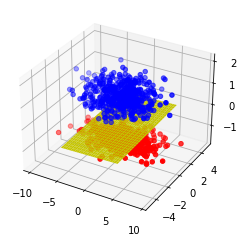

In [4]:
ax = plt.axes(projection="3d")
# Creating plot
ax.scatter3D(x, y, z, color="red")
x=X1[:,[0]]
y=X1[:,[1]]
z=X1[:,[2]]
ax.scatter3D(x,y,z,color="blue")
ax.plot([0,w[0]/denom],[0,w[1]/denom],[0,w[2]/denom],color="black")
#ax.plot([m1t.item(0),m2t.item(0)],[m1t.item(1),m2t.item(1)],[m1t.item(2),m2t.item(2)],color="orange")

a,b,c,d = w[0],w[1],w[2],sol
x = np.linspace(-5,5,30)
y = np.linspace(-5,5,30)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

surf = ax.plot_surface(X, Y, Z,color="yellow")
plt.show()

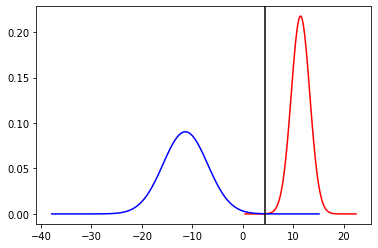

In [5]:
#Plot normal Distributions
mu1 = m1

variance = v1
sigma = math.sqrt(variance)
x = np.linspace(mu1 - 6*sigma, mu1 + 6*sigma, 100)
norm1=plt.plot(x, stats.norm.pdf(x, mu1, sigma),color="red")

mu2 = m2
variance = v2
sigma = math.sqrt(variance)
x = np.linspace(mu2 - 6*sigma, mu2 + 6*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu2, sigma),color="blue")
plt.axvline(x=sol,color="black")
plt.show()

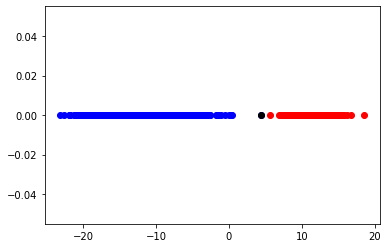

In [6]:
x = np.linspace(-10,20, 100)
plt.scatter(onedim0,np.zeros(np.shape(onedim0)),color='red')
plt.scatter(onedim1,np.zeros(np.shape(onedim1)),color='blue')
plt.scatter(sol,0,color='black')
plt.show()